In [1]:
import pandas as pd
import datetime

In [2]:
today = datetime.date(2020, 9, 14)

In [3]:
today

datetime.date(2020, 9, 14)

In [4]:
type(today)

datetime.date

In [5]:
today.year

2020

In [6]:
today.month

9

In [7]:
datetime.date(today.year, today.month, 1)

datetime.date(2020, 9, 1)

In [8]:
month_start = datetime.date(today.year, today.month, 1)

In [9]:
datetime.date(today.year, today.month+1, 1)

datetime.date(2020, 10, 1)

In [10]:
from datetime import timedelta

In [11]:
datetime.date(today.year, today.month+1, 1) - timedelta(days=1)

datetime.date(2020, 9, 30)

In [12]:
month_end = datetime.date(today.year, today.month+1, 1) - timedelta(days=1)
month_end

datetime.date(2020, 9, 30)

In [13]:
# today = datetime.date.today()

In [14]:
import_file = 'sample_auto03.xlsx'

In [15]:
excel_sheetname01 = '201909'
excel_sheetname02 = '202009'

In [16]:
df_201909 = pd.read_excel(import_file, sheet_name = excel_sheetname01,index_col='date')
df_201909.head()

sales   cost
date                       
2019-08-30  370193.0  10000
2019-08-31  604558.0  11000
2019-09-01  451000.0   3500
2019-09-02  313000.0   8000
2019-09-03  298000.0   9000

In [17]:
import pandas.tseries.offsets as offsets

In [18]:
df_201909.index + offsets.Day(364)

DatetimeIndex(['2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',
               '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
               '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28'],
              dtype='datetime64[ns]', name='date', freq='D')

In [19]:
df_201909['next_year'] = df_201909.index + offsets.Day(364)

In [20]:
df_201909.head(10)

sales   cost  next_year
date                                  
2019-08-30  370193.0  10000 2020-08-28
2019-08-31  604558.0  11000 2020-08-29
2019-09-01  451000.0   3500 2020-08-30
2019-09-02  313000.0   8000 2020-08-31
2019-09-03  298000.0   9000 2020-09-01
2019-09-04  310000.0  11000 2020-09-02
2019-09-05  290000.0   8000 2020-09-03
2019-09-06  369000.0  11000 2020-09-04
2019-09-07  602000.0  12000 2020-09-05
2019-09-08  655000.0  13000 2020-09-06

In [21]:
df_201909.head()

sales   cost  next_year
date                                  
2019-08-30  370193.0  10000 2020-08-28
2019-08-31  604558.0  11000 2020-08-29
2019-09-01  451000.0   3500 2020-08-30
2019-09-02  313000.0   8000 2020-08-31
2019-09-03  298000.0   9000 2020-09-01

In [22]:
df_201909 = df_201909.drop(columns=['cost'],axis=1)

In [23]:
df_201909.head()

sales  next_year
date                           
2019-08-30  370193.0 2020-08-28
2019-08-31  604558.0 2020-08-29
2019-09-01  451000.0 2020-08-30
2019-09-02  313000.0 2020-08-31
2019-09-03  298000.0 2020-09-01

### ▼２０２０年のデータの読み込み

In [24]:
df_202009 = pd.read_excel(import_file, sheet_name = excel_sheetname02,index_col='date')
df_202009.head()

sales    cost
date                        
2020-08-25  254364.0  1000.0
2020-08-26  286343.0  1000.0
2020-08-27  265857.0  1000.0
2020-08-28  302279.0  1000.0
2020-08-29  558500.0  1000.0

In [25]:
df_this_year = pd.merge(df_201909,df_202009,left_on='next_year',right_index=True,how='right')
df_this_year.head(15)

sales_x  next_year   sales_y    cost
2019-08-30  370193.0 2020-08-28  302279.0  1000.0
2019-08-31  604558.0 2020-08-29  558500.0  1000.0
2019-09-01  451000.0 2020-08-30  588152.0  1000.0
2019-09-02  313000.0 2020-08-31  281777.0  1000.0
2019-09-03  298000.0 2020-09-01  249000.0  1000.0
2019-09-04  310000.0 2020-09-02  286000.0  1000.0
2019-09-05  290000.0 2020-09-03  265000.0  1000.0
2019-09-06  369000.0 2020-09-04  301000.0  1000.0
2019-09-07  602000.0 2020-09-05  502000.0  1000.0
2019-09-08  655000.0 2020-09-06  568000.0  1000.0
2019-09-09  287000.0 2020-09-07  268000.0  1000.0
2019-09-10  268000.0 2020-09-08  248000.0  1500.0
2019-09-11  243000.0 2020-09-09  279000.0  1500.0
2019-09-12  251000.0 2020-09-10  250000.0  1500.0
2019-09-13  276000.0 2020-09-11  321000.0  1500.0

In [26]:
df_this_year = df_this_year.rename(columns={'sales_y':'this year sales','sales_x':'last year sales','next_year':'date'})
df_this_year.head()

last year sales       date  this year sales    cost
2019-08-30         370193.0 2020-08-28         302279.0  1000.0
2019-08-31         604558.0 2020-08-29         558500.0  1000.0
2019-09-01         451000.0 2020-08-30         588152.0  1000.0
2019-09-02         313000.0 2020-08-31         281777.0  1000.0
2019-09-03         298000.0 2020-09-01         249000.0  1000.0

In [27]:
df_this_year = df_this_year.set_index('date')
df_this_year

last year sales  this year sales    cost
date                                                
2020-08-28         370193.0         302279.0  1000.0
2020-08-29         604558.0         558500.0  1000.0
2020-08-30         451000.0         588152.0  1000.0
2020-08-31         313000.0         281777.0  1000.0
2020-09-01         298000.0         249000.0  1000.0
2020-09-02         310000.0         286000.0  1000.0
2020-09-03         290000.0         265000.0  1000.0
2020-09-04         369000.0         301000.0  1000.0
2020-09-05         602000.0         502000.0  1000.0
2020-09-06         655000.0         568000.0  1000.0
2020-09-07         287000.0         268000.0  1000.0
2020-09-08         268000.0         248000.0  1500.0
2020-09-09         243000.0         279000.0  1500.0
2020-09-10         251000.0         250000.0  1500.0
2020-09-11         276000.0         321000.0  1500.0
2020-09-12         420700.0         511000.0  1500.0
2020-09-13         478800.0         583000.0  1500.0
2020-09-14         392000.0              NaN     NaN
2020-09-15         260000.0              NaN     NaN
2020-09-16         245000.0              NaN     NaN
2020-09-17         239000.0              NaN     NaN
2020-09-18         399600.0              NaN     NaN
2020-09-19         652800.0              NaN     NaN
2020-09-20         744000.0              NaN     NaN
2020-09-21         390000.0              NaN     NaN
2020-09-22         249000.0              NaN     NaN
2020-09-23         212000.0              NaN     NaN
2020-09-24         246000.0              NaN     NaN
2020-09-25         267000.0              NaN     NaN
2020-09-26         466000.0              NaN     NaN
2020-09-27         491000.0              NaN     NaN
2020-09-28         239000.0              NaN     NaN
2020-08-25              NaN         254364.0  1000.0
2020-08-26              NaN         286343.0  1000.0
2020-08-27              NaN         265857.0  1000.0
2020-09-29              NaN              NaN     NaN
2020-09-30              NaN              NaN     NaN

In [28]:
df_this_year = df_this_year.sort_index()
df_this_year

last year sales  this year sales    cost
date                                                
2020-08-25              NaN         254364.0  1000.0
2020-08-26              NaN         286343.0  1000.0
2020-08-27              NaN         265857.0  1000.0
2020-08-28         370193.0         302279.0  1000.0
2020-08-29         604558.0         558500.0  1000.0
2020-08-30         451000.0         588152.0  1000.0
2020-08-31         313000.0         281777.0  1000.0
2020-09-01         298000.0         249000.0  1000.0
2020-09-02         310000.0         286000.0  1000.0
2020-09-03         290000.0         265000.0  1000.0
2020-09-04         369000.0         301000.0  1000.0
2020-09-05         602000.0         502000.0  1000.0
2020-09-06         655000.0         568000.0  1000.0
2020-09-07         287000.0         268000.0  1000.0
2020-09-08         268000.0         248000.0  1500.0
2020-09-09         243000.0         279000.0  1500.0
2020-09-10         251000.0         250000.0  1500.0
2020-09-11         276000.0         321000.0  1500.0
2020-09-12         420700.0         511000.0  1500.0
2020-09-13         478800.0         583000.0  1500.0
2020-09-14         392000.0              NaN     NaN
2020-09-15         260000.0              NaN     NaN
2020-09-16         245000.0              NaN     NaN
2020-09-17         239000.0              NaN     NaN
2020-09-18         399600.0              NaN     NaN
2020-09-19         652800.0              NaN     NaN
2020-09-20         744000.0              NaN     NaN
2020-09-21         390000.0              NaN     NaN
2020-09-22         249000.0              NaN     NaN
2020-09-23         212000.0              NaN     NaN
2020-09-24         246000.0              NaN     NaN
2020-09-25         267000.0              NaN     NaN
2020-09-26         466000.0              NaN     NaN
2020-09-27         491000.0              NaN     NaN
2020-09-28         239000.0              NaN     NaN
2020-09-29              NaN              NaN     NaN
2020-09-30              NaN              NaN     NaN

In [29]:
df_this_year['last year per'] = df_this_year['this year sales']/df_this_year['last year sales']
df_this_year

last year sales  this year sales    cost  last year per
date                                                               
2020-08-25              NaN         254364.0  1000.0            NaN
2020-08-26              NaN         286343.0  1000.0            NaN
2020-08-27              NaN         265857.0  1000.0            NaN
2020-08-28         370193.0         302279.0  1000.0       0.816544
2020-08-29         604558.0         558500.0  1000.0       0.923815
2020-08-30         451000.0         588152.0  1000.0       1.304106
2020-08-31         313000.0         281777.0  1000.0       0.900246
2020-09-01         298000.0         249000.0  1000.0       0.835570
2020-09-02         310000.0         286000.0  1000.0       0.922581
2020-09-03         290000.0         265000.0  1000.0       0.913793
2020-09-04         369000.0         301000.0  1000.0       0.815718
2020-09-05         602000.0         502000.0  1000.0       0.833887
2020-09-06         655000.0         568000.0  1000.0       0.867176
2020-09-07         287000.0         268000.0  1000.0       0.933798
2020-09-08         268000.0         248000.0  1500.0       0.925373
2020-09-09         243000.0         279000.0  1500.0       1.148148
2020-09-10         251000.0         250000.0  1500.0       0.996016
2020-09-11         276000.0         321000.0  1500.0       1.163043
2020-09-12         420700.0         511000.0  1500.0       1.214642
2020-09-13         478800.0         583000.0  1500.0       1.217627
2020-09-14         392000.0              NaN     NaN            NaN
2020-09-15         260000.0              NaN     NaN            NaN
2020-09-16         245000.0              NaN     NaN            NaN
2020-09-17         239000.0              NaN     NaN            NaN
2020-09-18         399600.0              NaN     NaN            NaN
2020-09-19         652800.0              NaN     NaN            NaN
2020-09-20         744000.0              NaN     NaN            NaN
2020-09-21         390000.0              NaN     NaN            NaN
2020-09-22         249000.0              NaN     NaN            NaN
2020-09-23         212000.0              NaN     NaN            NaN
2020-09-24         246000.0              NaN     NaN            NaN
2020-09-25         267000.0              NaN     NaN            NaN
2020-09-26         466000.0              NaN     NaN            NaN
2020-09-27         491000.0              NaN     NaN            NaN
2020-09-28         239000.0              NaN     NaN            NaN
2020-09-29              NaN              NaN     NaN            NaN
2020-09-30              NaN              NaN     NaN            NaN

### ▼前週比を計算

In [30]:
df_this_year['this year sales']

date
2020-08-25    254364.0
2020-08-26    286343.0
2020-08-27    265857.0
2020-08-28    302279.0
2020-08-29    558500.0
2020-08-30    588152.0
2020-08-31    281777.0
2020-09-01    249000.0
2020-09-02    286000.0
2020-09-03    265000.0
2020-09-04    301000.0
2020-09-05    502000.0
2020-09-06    568000.0
2020-09-07    268000.0
2020-09-08    248000.0
2020-09-09    279000.0
2020-09-10    250000.0
2020-09-11    321000.0
2020-09-12    511000.0
2020-09-13    583000.0
2020-09-14         NaN
2020-09-15         NaN
2020-09-16         NaN
2020-09-17         NaN
2020-09-18         NaN
2020-09-19         NaN
2020-09-20         NaN
2020-09-21         NaN
2020-09-22         NaN
2020-09-23         NaN
2020-09-24         NaN
2020-09-25         NaN
2020-09-26         NaN
2020-09-27         NaN
2020-09-28         NaN
2020-09-29         NaN
2020-09-30         NaN
Name: this year sales, dtype: float64

In [31]:
df_this_year['this year sales'].shift(7)

date
2020-08-25         NaN
2020-08-26         NaN
2020-08-27         NaN
2020-08-28         NaN
2020-08-29         NaN
2020-08-30         NaN
2020-08-31         NaN
2020-09-01    254364.0
2020-09-02    286343.0
2020-09-03    265857.0
2020-09-04    302279.0
2020-09-05    558500.0
2020-09-06    588152.0
2020-09-07    281777.0
2020-09-08    249000.0
2020-09-09    286000.0
2020-09-10    265000.0
2020-09-11    301000.0
2020-09-12    502000.0
2020-09-13    568000.0
2020-09-14    268000.0
2020-09-15    248000.0
2020-09-16    279000.0
2020-09-17    250000.0
2020-09-18    321000.0
2020-09-19    511000.0
2020-09-20    583000.0
2020-09-21         NaN
2020-09-22         NaN
2020-09-23         NaN
2020-09-24         NaN
2020-09-25         NaN
2020-09-26         NaN
2020-09-27         NaN
2020-09-28         NaN
2020-09-29         NaN
2020-09-30         NaN
Name: this year sales, dtype: float64

In [32]:
df_this_year['last week sales'] = df_this_year['this year sales'].shift(7)
df_this_year

last year sales  this year sales    cost  last year per  \
date                                                                  
2020-08-25              NaN         254364.0  1000.0            NaN   
2020-08-26              NaN         286343.0  1000.0            NaN   
2020-08-27              NaN         265857.0  1000.0            NaN   
2020-08-28         370193.0         302279.0  1000.0       0.816544   
2020-08-29         604558.0         558500.0  1000.0       0.923815   
2020-08-30         451000.0         588152.0  1000.0       1.304106   
2020-08-31         313000.0         281777.0  1000.0       0.900246   
2020-09-01         298000.0         249000.0  1000.0       0.835570   
2020-09-02         310000.0         286000.0  1000.0       0.922581   
2020-09-03         290000.0         265000.0  1000.0       0.913793   
2020-09-04         369000.0         301000.0  1000.0       0.815718   
2020-09-05         602000.0         502000.0  1000.0       0.833887   
2020-09-06         655000.0         568000.0  1000.0       0.867176   
2020-09-07         287000.0         268000.0  1000.0       0.933798   
2020-09-08         268000.0         248000.0  1500.0       0.925373   
2020-09-09         243000.0         279000.0  1500.0       1.148148   
2020-09-10         251000.0         250000.0  1500.0       0.996016   
2020-09-11         276000.0         321000.0  1500.0       1.163043   
2020-09-12         420700.0         511000.0  1500.0       1.214642   
2020-09-13         478800.0         583000.0  1500.0       1.217627   
2020-09-14         392000.0              NaN     NaN            NaN   
2020-09-15         260000.0              NaN     NaN            NaN   
2020-09-16         245000.0              NaN     NaN            NaN   
2020-09-17         239000.0              NaN     NaN            NaN   
2020-09-18         399600.0              NaN     NaN            NaN   
2020-09-19         652800.0              NaN     NaN            NaN   
2020-09-20         744000.0              NaN     NaN            NaN   
2020-09-21         390000.0              NaN     NaN            NaN   
2020-09-22         249000.0              NaN     NaN            NaN   
2020-09-23         212000.0              NaN     NaN            NaN   
2020-09-24         246000.0              NaN     NaN            NaN   
2020-09-25         267000.0              NaN     NaN            NaN   
2020-09-26         466000.0              NaN     NaN            NaN   
2020-09-27         491000.0              NaN     NaN            NaN   
2020-09-28         239000.0              NaN     NaN            NaN   
2020-09-29              NaN              NaN     NaN            NaN   
2020-09-30              NaN              NaN     NaN            NaN   

            last week sales  
date                         
2020-08-25              NaN  
2020-08-26              NaN  
2020-08-27              NaN  
2020-08-28              NaN  
2020-08-29              NaN  
2020-08-30              NaN  
2020-08-31              NaN  
2020-09-01         254364.0  
2020-09-02         286343.0  
2020-09-03         265857.0  
2020-09-04         302279.0  
2020-09-05         558500.0  
2020-09-06         588152.0  
2020-09-07         281777.0  
2020-09-08         249000.0  
2020-09-09         286000.0  
2020-09-10         265000.0  
2020-09-11         301000.0  
2020-09-12         502000.0  
2020-09-13         568000.0  
2020-09-14         268000.0  
2020-09-15         248000.0  
2020-09-16         279000.0  
2020-09-17         250000.0  
2020-09-18         321000.0  
2020-09-19         511000.0  
2020-09-20         583000.0  
2020-09-21              NaN  
2020-09-22              NaN  
2020-09-23              NaN  
2020-09-24              NaN  
2020-09-25              NaN  
2020-09-26              NaN  
2020-09-27              NaN  
2020-09-28              NaN  
2020-09-29              NaN  
2020-09-30              NaN

In [33]:
df_this_year['last week per'] = df_this_year['this year sales']/df_this_year['last week sales']
df_this_year

last year sales  this year sales    cost  last year per  \
date                                                                  
2020-08-25              NaN         254364.0  1000.0            NaN   
2020-08-26              NaN         286343.0  1000.0            NaN   
2020-08-27              NaN         265857.0  1000.0            NaN   
2020-08-28         370193.0         302279.0  1000.0       0.816544   
2020-08-29         604558.0         558500.0  1000.0       0.923815   
2020-08-30         451000.0         588152.0  1000.0       1.304106   
2020-08-31         313000.0         281777.0  1000.0       0.900246   
2020-09-01         298000.0         249000.0  1000.0       0.835570   
2020-09-02         310000.0         286000.0  1000.0       0.922581   
2020-09-03         290000.0         265000.0  1000.0       0.913793   
2020-09-04         369000.0         301000.0  1000.0       0.815718   
2020-09-05         602000.0         502000.0  1000.0       0.833887   
2020-09-06         655000.0         568000.0  1000.0       0.867176   
2020-09-07         287000.0         268000.0  1000.0       0.933798   
2020-09-08         268000.0         248000.0  1500.0       0.925373   
2020-09-09         243000.0         279000.0  1500.0       1.148148   
2020-09-10         251000.0         250000.0  1500.0       0.996016   
2020-09-11         276000.0         321000.0  1500.0       1.163043   
2020-09-12         420700.0         511000.0  1500.0       1.214642   
2020-09-13         478800.0         583000.0  1500.0       1.217627   
2020-09-14         392000.0              NaN     NaN            NaN   
2020-09-15         260000.0              NaN     NaN            NaN   
2020-09-16         245000.0              NaN     NaN            NaN   
2020-09-17         239000.0              NaN     NaN            NaN   
2020-09-18         399600.0              NaN     NaN            NaN   
2020-09-19         652800.0              NaN     NaN            NaN   
2020-09-20         744000.0              NaN     NaN            NaN   
2020-09-21         390000.0              NaN     NaN            NaN   
2020-09-22         249000.0              NaN     NaN            NaN   
2020-09-23         212000.0              NaN     NaN            NaN   
2020-09-24         246000.0              NaN     NaN            NaN   
2020-09-25         267000.0              NaN     NaN            NaN   
2020-09-26         466000.0              NaN     NaN            NaN   
2020-09-27         491000.0              NaN     NaN            NaN   
2020-09-28         239000.0              NaN     NaN            NaN   
2020-09-29              NaN              NaN     NaN            NaN   
2020-09-30              NaN              NaN     NaN            NaN   

            last week sales  last week per  
date                                        
2020-08-25              NaN            NaN  
2020-08-26              NaN            NaN  
2020-08-27              NaN            NaN  
2020-08-28              NaN            NaN  
2020-08-29              NaN            NaN  
2020-08-30              NaN            NaN  
2020-08-31              NaN            NaN  
2020-09-01         254364.0       0.978912  
2020-09-02         286343.0       0.998802  
2020-09-03         265857.0       0.996776  
2020-09-04         302279.0       0.995769  
2020-09-05         558500.0       0.898836  
2020-09-06         588152.0       0.965737  
2020-09-07         281777.0       0.951107  
2020-09-08         249000.0       0.995984  
2020-09-09         286000.0       0.975524  
2020-09-10         265000.0       0.943396  
2020-09-11         301000.0       1.066445  
2020-09-12         502000.0       1.017928  
2020-09-13         568000.0       1.026408  
2020-09-14         268000.0            NaN  
2020-09-15         248000.0            NaN  
2020-09-16         279000.0            NaN  
2020-09-17         250000.0            NaN  
2020-09-18         321000.0            NaN  
2020-09-19         511000.0

In [34]:
#df_this_year.index >= today

In [35]:
df_this_year.index >= pd.to_datetime(today)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [36]:
(df_this_year.index >= pd.to_datetime(month_start)) & (df_this_year.index < pd.to_datetime(today))

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [37]:
df_this_year[(df_this_year.index >= pd.to_datetime(month_start)) & (df_this_year.index < pd.to_datetime(today))]

last year sales  this year sales    cost  last year per  \
date                                                                  
2020-09-01         298000.0         249000.0  1000.0       0.835570   
2020-09-02         310000.0         286000.0  1000.0       0.922581   
2020-09-03         290000.0         265000.0  1000.0       0.913793   
2020-09-04         369000.0         301000.0  1000.0       0.815718   
2020-09-05         602000.0         502000.0  1000.0       0.833887   
2020-09-06         655000.0         568000.0  1000.0       0.867176   
2020-09-07         287000.0         268000.0  1000.0       0.933798   
2020-09-08         268000.0         248000.0  1500.0       0.925373   
2020-09-09         243000.0         279000.0  1500.0       1.148148   
2020-09-10         251000.0         250000.0  1500.0       0.996016   
2020-09-11         276000.0         321000.0  1500.0       1.163043   
2020-09-12         420700.0         511000.0  1500.0       1.214642   
2020-09-13         478800.0         583000.0  1500.0       1.217627   

            last week sales  last week per  
date                                        
2020-09-01         254364.0       0.978912  
2020-09-02         286343.0       0.998802  
2020-09-03         265857.0       0.996776  
2020-09-04         302279.0       0.995769  
2020-09-05         558500.0       0.898836  
2020-09-06         588152.0       0.965737  
2020-09-07         281777.0       0.951107  
2020-09-08         249000.0       0.995984  
2020-09-09         286000.0       0.975524  
2020-09-10         265000.0       0.943396  
2020-09-11         301000.0       1.066445  
2020-09-12         502000.0       1.017928  
2020-09-13         568000.0       1.026408

In [38]:
df_this_year = df_this_year[(df_this_year.index >= pd.to_datetime(month_start)) & (df_this_year.index < pd.to_datetime(today))]
df_this_year

last year sales  this year sales    cost  last year per  \
date                                                                  
2020-09-01         298000.0         249000.0  1000.0       0.835570   
2020-09-02         310000.0         286000.0  1000.0       0.922581   
2020-09-03         290000.0         265000.0  1000.0       0.913793   
2020-09-04         369000.0         301000.0  1000.0       0.815718   
2020-09-05         602000.0         502000.0  1000.0       0.833887   
2020-09-06         655000.0         568000.0  1000.0       0.867176   
2020-09-07         287000.0         268000.0  1000.0       0.933798   
2020-09-08         268000.0         248000.0  1500.0       0.925373   
2020-09-09         243000.0         279000.0  1500.0       1.148148   
2020-09-10         251000.0         250000.0  1500.0       0.996016   
2020-09-11         276000.0         321000.0  1500.0       1.163043   
2020-09-12         420700.0         511000.0  1500.0       1.214642   
2020-09-13         478800.0         583000.0  1500.0       1.217627   

            last week sales  last week per  
date                                        
2020-09-01         254364.0       0.978912  
2020-09-02         286343.0       0.998802  
2020-09-03         265857.0       0.996776  
2020-09-04         302279.0       0.995769  
2020-09-05         558500.0       0.898836  
2020-09-06         588152.0       0.965737  
2020-09-07         281777.0       0.951107  
2020-09-08         249000.0       0.995984  
2020-09-09         286000.0       0.975524  
2020-09-10         265000.0       0.943396  
2020-09-11         301000.0       1.066445  
2020-09-12         502000.0       1.017928  
2020-09-13         568000.0       1.026408

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

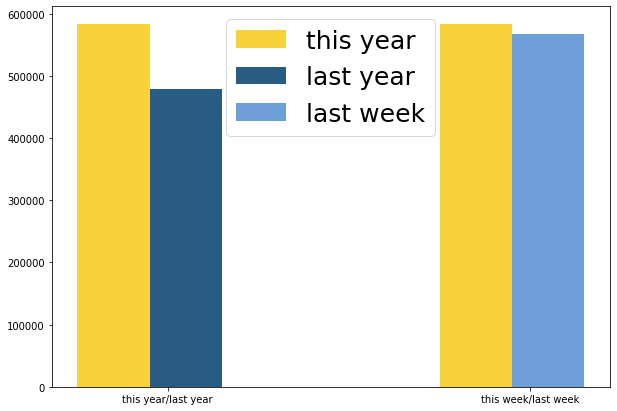

In [40]:
plt.figure(figsize=(10,7))
            
x1 = [1, 2]
y1 = [df_this_year.loc['2020-09-13','this year sales'],df_this_year.loc['2020-09-13','this year sales']]

x2 = [1.2]
y2 = [df_this_year.loc['2020-09-13','last year sales']]

x3 = [2.2]
y3 = [df_this_year.loc['2020-09-13','last week sales']]

plt.bar(x1, y1, color='#F7D238',label='this year', width=0.2, align="center")
plt.bar(x2, y2, color='#295C82', label='last year', width=0.2, align="center")
plt.bar(x3, y3, color='#6D9ED8', label='last week', width=0.2, align="center")

label_x = ['this year/last year', 'this week/last week']
plt.xticks([1.15, 2.15], label_x)

plt.legend(fontsize=25,loc='upper center')

plt.savefig("graph01.png",dpi=60)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


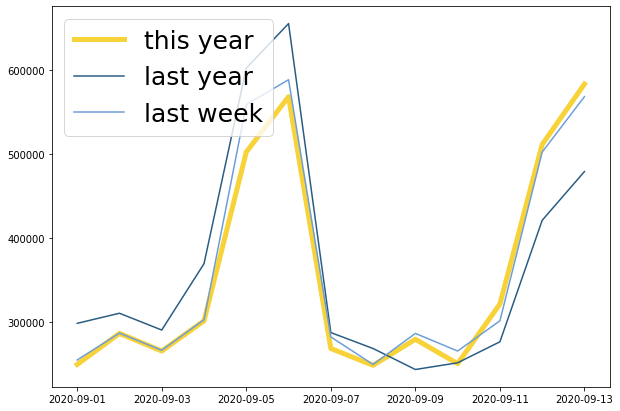

In [41]:
plt.figure(figsize=(10,7))

x = df_this_year.index
y1 = df_this_year['this year sales']
y2 = df_this_year['last year sales']
y3 = df_this_year['last week sales']

plt.plot(x, y1, color="#F7D238", label='this year' , linewidth="5")
plt.plot(x, y2, color="#295C82", label='last year')
plt.plot(x, y3, color="#6D9ED8", label='last week')

plt.legend(fontsize=25,loc='upper left')

plt.savefig("graph02.png",dpi=60)

# ▼重回帰分析

In [42]:
df_201909 = pd.read_excel(import_file, sheet_name = excel_sheetname01,index_col='date')
df_201909 = df_201909[['sales','cost']]

In [43]:
#Excelデータ読み込み
df_202009 = pd.read_excel(import_file, sheet_name = excel_sheetname02,index_col='date')
df_202009 = df_202009[['sales','cost']]

In [44]:
pd.concat([df_201909,df_202009])

sales     cost
date                         
2019-08-30  370193.0  10000.0
2019-08-31  604558.0  11000.0
2019-09-01  451000.0   3500.0
2019-09-02  313000.0   8000.0
2019-09-03  298000.0   9000.0
...              ...      ...
2020-09-26       NaN      NaN
2020-09-27       NaN      NaN
2020-09-28       NaN      NaN
2020-09-29       NaN      NaN
2020-09-30       NaN      NaN

[69 rows x 2 columns]

In [45]:
df_concat = pd.concat([df_201909,df_202009])

In [46]:
df_concat['weekday_name'] = df_concat.index.weekday_name

In [47]:
df_concat

sales     cost weekday_name
date                                      
2019-08-30  370193.0  10000.0       Friday
2019-08-31  604558.0  11000.0     Saturday
2019-09-01  451000.0   3500.0       Sunday
2019-09-02  313000.0   8000.0       Monday
2019-09-03  298000.0   9000.0      Tuesday
...              ...      ...          ...
2020-09-26       NaN      NaN     Saturday
2020-09-27       NaN      NaN       Sunday
2020-09-28       NaN      NaN       Monday
2020-09-29       NaN      NaN      Tuesday
2020-09-30       NaN      NaN    Wednesday

[69 rows x 3 columns]

In [48]:
df_concat = df_concat.dropna()
df_concat

sales     cost weekday_name
date                                      
2019-08-30  370193.0  10000.0       Friday
2019-08-31  604558.0  11000.0     Saturday
2019-09-01  451000.0   3500.0       Sunday
2019-09-02  313000.0   8000.0       Monday
2019-09-03  298000.0   9000.0      Tuesday
2019-09-04  310000.0  11000.0    Wednesday
2019-09-05  290000.0   8000.0     Thursday
2019-09-06  369000.0  11000.0       Friday
2019-09-07  602000.0  12000.0     Saturday
2019-09-08  655000.0  13000.0       Sunday
2019-09-09  287000.0   2000.0       Monday
2019-09-10  268000.0   2000.0      Tuesday
2019-09-11  243000.0   1000.0    Wednesday
2019-09-12  251000.0   2000.0     Thursday
2019-09-13  276000.0   1000.0       Friday
2019-09-14  420700.0   2500.0     Saturday
2019-09-15  478800.0   1000.0       Sunday
2019-09-16  392000.0   2500.0       Monday
2019-09-17  260000.0   2000.0      Tuesday
2019-09-18  245000.0   1000.0    Wednesday
2019-09-19  239000.0   1000.0     Thursday
2019-09-20  399600.0  18000.0       Friday
2019-09-21  652800.0  19000.0     Saturday
2019-09-22  744000.0  22000.0       Sunday
2019-09-23  390000.0   3000.0       Monday
2019-09-24  249000.0   2000.0      Tuesday
2019-09-25  212000.0   1000.0    Wednesday
2019-09-26  246000.0   2000.0     Thursday
2019-09-27  267000.0   2000.0       Friday
2019-09-28  466000.0   1000.0     Saturday
2019-09-29  491000.0   1000.0       Sunday
2019-09-30  239000.0   1000.0       Monday
2020-08-25  254364.0   1000.0      Tuesday
2020-08-26  286343.0   1000.0    Wednesday
2020-08-27  265857.0   1000.0     Thursday
2020-08-28  302279.0   1000.0       Friday
2020-08-29  558500.0   1000.0     Saturday
2020-08-30  588152.0   1000.0       Sunday
2020-08-31  281777.0   1000.0       Monday
2020-09-01  249000.0   1000.0      Tuesday
2020-09-02  286000.0   1000.0    Wednesday
2020-09-03  265000.0   1000.0     Thursday
2020-09-04  301000.0   1000.0       Friday
2020-09-05  502000.0   1000.0     Saturday
2020-09-06  568000.0   1000.0       Sunday
2020-09-07  268000.0   1000.0       Monday
2020-09-08  248000.0   1500.0      Tuesday
2020-09-09  279000.0   1500.0    Wednesday
2020-09-10  250000.0   1500.0     Thursday
2020-09-11  321000.0   1500.0       Friday
2020-09-12  511000.0   1500.0     Saturday
2020-09-13  583000.0   1500.0       Sunday

In [49]:
df_201909_weekdayname = df_concat[['weekday_name','sales']].groupby('weekday_name').mean()
df_201909_weekdayname

sales
weekday_name               
Friday        325759.000000
Monday        310111.000000
Saturday      539694.750000
Sunday        569869.000000
Thursday      258122.428571
Tuesday       260909.142857
Wednesday     265906.142857

<BarContainer object of 7 artists>

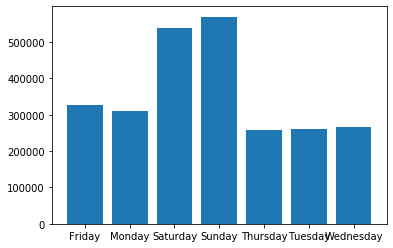

In [50]:
plt.bar(df_201909_weekdayname.index,df_201909_weekdayname['sales'])

In [51]:
import seaborn as sns

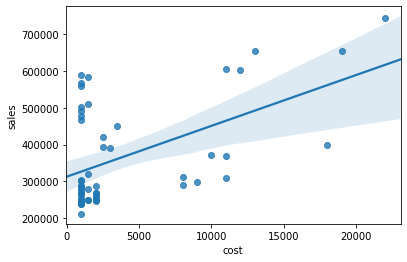

In [52]:
sns.regplot(x=df_concat["cost"], y=df_concat["sales"], data=df_concat)

In [53]:
def find_weekend(weekday_name):
    if  (weekday_name == "Saturday") or (weekday_name == "Sunday"):
        return "weekend"
    else:
        return "weekday"

In [54]:
df_concat["weekday_name"].apply(find_weekend)

date
2019-08-30    weekday
2019-08-31    weekend
2019-09-01    weekend
2019-09-02    weekday
2019-09-03    weekday
2019-09-04    weekday
2019-09-05    weekday
2019-09-06    weekday
2019-09-07    weekend
2019-09-08    weekend
2019-09-09    weekday
2019-09-10    weekday
2019-09-11    weekday
2019-09-12    weekday
2019-09-13    weekday
2019-09-14    weekend
2019-09-15    weekend
2019-09-16    weekday
2019-09-17    weekday
2019-09-18    weekday
2019-09-19    weekday
2019-09-20    weekday
2019-09-21    weekend
2019-09-22    weekend
2019-09-23    weekday
2019-09-24    weekday
2019-09-25    weekday
2019-09-26    weekday
2019-09-27    weekday
2019-09-28    weekend
2019-09-29    weekend
2019-09-30    weekday
2020-08-25    weekday
2020-08-26    weekday
2020-08-27    weekday
2020-08-28    weekday
2020-08-29    weekend
2020-08-30    weekend
2020-08-31    weekday
2020-09-01    weekday
2020-09-02    weekday
2020-09-03    weekday
2020-09-04    weekday
2020-09-05    weekend
2020-09-06    weekend
2020-

In [55]:
df_concat["weekend"] = df_concat["weekday_name"].apply(find_weekend)
df_concat.head(14)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


sales     cost weekday_name  weekend
date                                               
2019-08-30  370193.0  10000.0       Friday  weekday
2019-08-31  604558.0  11000.0     Saturday  weekend
2019-09-01  451000.0   3500.0       Sunday  weekend
2019-09-02  313000.0   8000.0       Monday  weekday
2019-09-03  298000.0   9000.0      Tuesday  weekday
2019-09-04  310000.0  11000.0    Wednesday  weekday
2019-09-05  290000.0   8000.0     Thursday  weekday
2019-09-06  369000.0  11000.0       Friday  weekday
2019-09-07  602000.0  12000.0     Saturday  weekend
2019-09-08  655000.0  13000.0       Sunday  weekend
2019-09-09  287000.0   2000.0       Monday  weekday
2019-09-10  268000.0   2000.0      Tuesday  weekday
2019-09-11  243000.0   1000.0    Wednesday  weekday
2019-09-12  251000.0   2000.0     Thursday  weekday

In [56]:
df_concat = df_concat.drop(columns='weekday_name',axis=1)
df_concat.head()

sales     cost  weekend
date                                  
2019-08-30  370193.0  10000.0  weekday
2019-08-31  604558.0  11000.0  weekend
2019-09-01  451000.0   3500.0  weekend
2019-09-02  313000.0   8000.0  weekday
2019-09-03  298000.0   9000.0  weekday

In [57]:
import sklearn
from sklearn.linear_model import LinearRegression

In [58]:
df_201909_dummies = pd.get_dummies(df_concat)
df_201909_dummies

sales     cost  weekend_weekday  weekend_weekend
date                                                           
2019-08-30  370193.0  10000.0                1                0
2019-08-31  604558.0  11000.0                0                1
2019-09-01  451000.0   3500.0                0                1
2019-09-02  313000.0   8000.0                1                0
2019-09-03  298000.0   9000.0                1                0
2019-09-04  310000.0  11000.0                1                0
2019-09-05  290000.0   8000.0                1                0
2019-09-06  369000.0  11000.0                1                0
2019-09-07  602000.0  12000.0                0                1
2019-09-08  655000.0  13000.0                0                1
2019-09-09  287000.0   2000.0                1                0
2019-09-10  268000.0   2000.0                1                0
2019-09-11  243000.0   1000.0                1                0
2019-09-12  251000.0   2000.0                1                0
2019-09-13  276000.0   1000.0                1                0
2019-09-14  420700.0   2500.0                0                1
2019-09-15  478800.0   1000.0                0                1
2019-09-16  392000.0   2500.0                1                0
2019-09-17  260000.0   2000.0                1                0
2019-09-18  245000.0   1000.0                1                0
2019-09-19  239000.0   1000.0                1                0
2019-09-20  399600.0  18000.0                1                0
2019-09-21  652800.0  19000.0                0                1
2019-09-22  744000.0  22000.0                0                1
2019-09-23  390000.0   3000.0                1                0
2019-09-24  249000.0   2000.0                1                0
2019-09-25  212000.0   1000.0                1                0
2019-09-26  246000.0   2000.0                1                0
2019-09-27  267000.0   2000.0                1                0
2019-09-28  466000.0   1000.0                0                1
2019-09-29  491000.0   1000.0                0                1
2019-09-30  239000.0   1000.0                1                0
2020-08-25  254364.0   1000.0                1                0
2020-08-26  286343.0   1000.0                1                0
2020-08-27  265857.0   1000.0                1                0
2020-08-28  302279.0   1000.0                1                0
2020-08-29  558500.0   1000.0                0                1
2020-08-30  588152.0   1000.0                0                1
2020-08-31  281777.0   1000.0                1                0
2020-09-01  249000.0   1000.0                1                0
2020-09-02  286000.0   1000.0                1                0
2020-09-03  265000.0   1000.0                1                0
2020-09-04  301000.0   1000.0                1                0
2020-09-05  502000.0   1000.0                0                1
2020-09-06  568000.0   1000.0                0                1
2020-09-07  268000.0   1000.0                1                0
2020-09-08  248000.0   1500.0                1                0
2020-09-09  279000.0   1500.0                1                0
2020-09-10  250000.0   1500.0                1                0
2020-09-11  321000.0   1500.0                1                0
2020-09-12  511000.0   1500.0                0                1
2020-09-13  583000.0   1500.0                0                1

In [59]:
x = df_201909_dummies.drop('sales',axis=1)

In [60]:
y = df_201909_dummies['sales']

In [61]:
model = LinearRegression()

In [62]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
model.intercept_

380096.40087424684

In [64]:
model.coef_

array([ 8.83075867e+00, -1.23356689e+05,  1.23356689e+05])

In [65]:
df_201909_dummies.columns

Index(['sales', 'cost', 'weekend_weekday', 'weekend_weekend'], dtype='object')

In [66]:
features = df_201909_dummies.drop('sales',axis=1).columns

In [67]:
features

Index(['cost', 'weekend_weekday', 'weekend_weekend'], dtype='object')

In [68]:
df_coefficient = pd.DataFrame({'features_name':features,'coefficient':model.coef_})
df_coefficient

features_name    coefficient
0             cost       8.830759
1  weekend_weekday -123356.689351
2  weekend_weekend  123356.689351

In [69]:
model.score(x, y)

0.9127081209775233

In [70]:
df_this_year.head()

last year sales  this year sales    cost  last year per  \
date                                                                  
2020-09-01         298000.0         249000.0  1000.0       0.835570   
2020-09-02         310000.0         286000.0  1000.0       0.922581   
2020-09-03         290000.0         265000.0  1000.0       0.913793   
2020-09-04         369000.0         301000.0  1000.0       0.815718   
2020-09-05         602000.0         502000.0  1000.0       0.833887   

            last week sales  last week per  
date                                        
2020-09-01         254364.0       0.978912  
2020-09-02         286343.0       0.998802  
2020-09-03         265857.0       0.996776  
2020-09-04         302279.0       0.995769  
2020-09-05         558500.0       0.898836

In [71]:
pd.date_range(start=today, end=month_end, freq='D')

DatetimeIndex(['2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30'],
              dtype='datetime64[ns]', freq='D')

In [72]:
date_range = pd.date_range(start=today, end=month_end, freq='D')

In [73]:
df_prediction = pd.DataFrame(index=date_range, columns=['this year sales','this year sales(cost)'])
df_prediction

this year sales this year sales(cost)
2020-09-14             NaN                   NaN
2020-09-15             NaN                   NaN
2020-09-16             NaN                   NaN
2020-09-17             NaN                   NaN
2020-09-18             NaN                   NaN
2020-09-19             NaN                   NaN
2020-09-20             NaN                   NaN
2020-09-21             NaN                   NaN
2020-09-22             NaN                   NaN
2020-09-23             NaN                   NaN
2020-09-24             NaN                   NaN
2020-09-25             NaN                   NaN
2020-09-26             NaN                   NaN
2020-09-27             NaN                   NaN
2020-09-28             NaN                   NaN
2020-09-29             NaN                   NaN
2020-09-30             NaN                   NaN

In [74]:
df_prediction['weekday_name'] = df_prediction.index.weekday_name
df_prediction

this year sales this year sales(cost) weekday_name
2020-09-14             NaN                   NaN       Monday
2020-09-15             NaN                   NaN      Tuesday
2020-09-16             NaN                   NaN    Wednesday
2020-09-17             NaN                   NaN     Thursday
2020-09-18             NaN                   NaN       Friday
2020-09-19             NaN                   NaN     Saturday
2020-09-20             NaN                   NaN       Sunday
2020-09-21             NaN                   NaN       Monday
2020-09-22             NaN                   NaN      Tuesday
2020-09-23             NaN                   NaN    Wednesday
2020-09-24             NaN                   NaN     Thursday
2020-09-25             NaN                   NaN       Friday
2020-09-26             NaN                   NaN     Saturday
2020-09-27             NaN                   NaN       Sunday
2020-09-28             NaN                   NaN       Monday
2020-09-29             NaN                   NaN      Tuesday
2020-09-30             NaN                   NaN    Wednesday

In [75]:
df_prediction["weekend"] = df_prediction["weekday_name"].apply(find_weekend)

In [76]:
df_prediction

this year sales this year sales(cost) weekday_name  weekend
2020-09-14             NaN                   NaN       Monday  weekday
2020-09-15             NaN                   NaN      Tuesday  weekday
2020-09-16             NaN                   NaN    Wednesday  weekday
2020-09-17             NaN                   NaN     Thursday  weekday
2020-09-18             NaN                   NaN       Friday  weekday
2020-09-19             NaN                   NaN     Saturday  weekend
2020-09-20             NaN                   NaN       Sunday  weekend
2020-09-21             NaN                   NaN       Monday  weekday
2020-09-22             NaN                   NaN      Tuesday  weekday
2020-09-23             NaN                   NaN    Wednesday  weekday
2020-09-24             NaN                   NaN     Thursday  weekday
2020-09-25             NaN                   NaN       Friday  weekday
2020-09-26             NaN                   NaN     Saturday  weekend
2020-09-27             NaN                   NaN       Sunday  weekend
2020-09-28             NaN                   NaN       Monday  weekday
2020-09-29             NaN                   NaN      Tuesday  weekday
2020-09-30             NaN                   NaN    Wednesday  weekday

In [77]:
y = model.intercept_ 
x_cost = model.coef_[0]
x_weekday = model.coef_[1]
x_weekend = model.coef_[2]

In [78]:
for index_name in df_prediction.index:
    print(index_name)

2020-09-14 00:00:00
2020-09-15 00:00:00
2020-09-16 00:00:00
2020-09-17 00:00:00
2020-09-18 00:00:00
2020-09-19 00:00:00
2020-09-20 00:00:00
2020-09-21 00:00:00
2020-09-22 00:00:00
2020-09-23 00:00:00
2020-09-24 00:00:00
2020-09-25 00:00:00
2020-09-26 00:00:00
2020-09-27 00:00:00
2020-09-28 00:00:00
2020-09-29 00:00:00
2020-09-30 00:00:00


In [79]:
for index_name in df_prediction.index:
    print(df_prediction.loc[index_name,'weekend'])

weekday
weekday
weekday
weekday
weekday
weekend
weekend
weekday
weekday
weekday
weekday
weekday
weekend
weekend
weekday
weekday
weekday


In [80]:
cost=10000

In [81]:
for index_name in df_prediction.index:
    if df_prediction.loc[index_name,'weekend'] == "weekend":
        df_prediction.loc[index_name,'this year sales'] = y + x_weekend + x_cost*0
        df_prediction.loc[index_name,'this year sales(cost)'] = y + x_weekend + x_cost*cost
    else:
        df_prediction.loc[index_name,'this year sales'] = y + x_weekday + cost*0
        df_prediction.loc[index_name,'this year sales(cost)'] = y + x_weekday + x_cost*cost

In [82]:
df_prediction

this year sales this year sales(cost) weekday_name  weekend
2020-09-14          256740                345047       Monday  weekday
2020-09-15          256740                345047      Tuesday  weekday
2020-09-16          256740                345047    Wednesday  weekday
2020-09-17          256740                345047     Thursday  weekday
2020-09-18          256740                345047       Friday  weekday
2020-09-19          503453                591761     Saturday  weekend
2020-09-20          503453                591761       Sunday  weekend
2020-09-21          256740                345047       Monday  weekday
2020-09-22          256740                345047      Tuesday  weekday
2020-09-23          256740                345047    Wednesday  weekday
2020-09-24          256740                345047     Thursday  weekday
2020-09-25          256740                345047       Friday  weekday
2020-09-26          503453                591761     Saturday  weekend
2020-09-27          503453                591761       Sunday  weekend
2020-09-28          256740                345047       Monday  weekday
2020-09-29          256740                345047      Tuesday  weekday
2020-09-30          256740                345047    Wednesday  weekday

In [83]:
df_prediction = df_prediction.drop(columns=['weekday_name','weekend'])
df_prediction.head(7)

this year sales this year sales(cost)
2020-09-14          256740                345047
2020-09-15          256740                345047
2020-09-16          256740                345047
2020-09-17          256740                345047
2020-09-18          256740                345047
2020-09-19          503453                591761
2020-09-20          503453                591761

In [84]:
df_this_year['this year sales(cost)']=df_this_year['this year sales']
df_this_year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


last year sales  this year sales    cost  last year per  \
date                                                                  
2020-09-01         298000.0         249000.0  1000.0       0.835570   
2020-09-02         310000.0         286000.0  1000.0       0.922581   
2020-09-03         290000.0         265000.0  1000.0       0.913793   
2020-09-04         369000.0         301000.0  1000.0       0.815718   
2020-09-05         602000.0         502000.0  1000.0       0.833887   
2020-09-06         655000.0         568000.0  1000.0       0.867176   
2020-09-07         287000.0         268000.0  1000.0       0.933798   
2020-09-08         268000.0         248000.0  1500.0       0.925373   
2020-09-09         243000.0         279000.0  1500.0       1.148148   
2020-09-10         251000.0         250000.0  1500.0       0.996016   
2020-09-11         276000.0         321000.0  1500.0       1.163043   
2020-09-12         420700.0         511000.0  1500.0       1.214642   
2020-09-13         478800.0         583000.0  1500.0       1.217627   

            last week sales  last week per  this year sales(cost)  
date                                                               
2020-09-01         254364.0       0.978912               249000.0  
2020-09-02         286343.0       0.998802               286000.0  
2020-09-03         265857.0       0.996776               265000.0  
2020-09-04         302279.0       0.995769               301000.0  
2020-09-05         558500.0       0.898836               502000.0  
2020-09-06         588152.0       0.965737               568000.0  
2020-09-07         281777.0       0.951107               268000.0  
2020-09-08         249000.0       0.995984               248000.0  
2020-09-09         286000.0       0.975524               279000.0  
2020-09-10         265000.0       0.943396               250000.0  
2020-09-11         301000.0       1.066445               321000.0  
2020-09-12         502000.0       1.017928               511000.0  
2020-09-13         568000.0       1.026408               583000.0

In [85]:
df_this_year = pd.concat([df_this_year,df_prediction],sort = False)
df_this_year

last year sales this year sales    cost  last year per  \
2020-09-01         298000.0          249000  1000.0       0.835570   
2020-09-02         310000.0          286000  1000.0       0.922581   
2020-09-03         290000.0          265000  1000.0       0.913793   
2020-09-04         369000.0          301000  1000.0       0.815718   
2020-09-05         602000.0          502000  1000.0       0.833887   
2020-09-06         655000.0          568000  1000.0       0.867176   
2020-09-07         287000.0          268000  1000.0       0.933798   
2020-09-08         268000.0          248000  1500.0       0.925373   
2020-09-09         243000.0          279000  1500.0       1.148148   
2020-09-10         251000.0          250000  1500.0       0.996016   
2020-09-11         276000.0          321000  1500.0       1.163043   
2020-09-12         420700.0          511000  1500.0       1.214642   
2020-09-13         478800.0          583000  1500.0       1.217627   
2020-09-14              NaN          256740     NaN            NaN   
2020-09-15              NaN          256740     NaN            NaN   
2020-09-16              NaN          256740     NaN            NaN   
2020-09-17              NaN          256740     NaN            NaN   
2020-09-18              NaN          256740     NaN            NaN   
2020-09-19              NaN          503453     NaN            NaN   
2020-09-20              NaN          503453     NaN            NaN   
2020-09-21              NaN          256740     NaN            NaN   
2020-09-22              NaN          256740     NaN            NaN   
2020-09-23              NaN          256740     NaN            NaN   
2020-09-24              NaN          256740     NaN            NaN   
2020-09-25              NaN          256740     NaN            NaN   
2020-09-26              NaN          503453     NaN            NaN   
2020-09-27              NaN          503453     NaN            NaN   
2020-09-28              NaN          256740     NaN            NaN   
2020-09-29              NaN          256740     NaN            NaN   
2020-09-30              NaN          256740     NaN            NaN   

            last week sales  last week per this year sales(cost)  
2020-09-01         254364.0       0.978912                249000  
2020-09-02         286343.0       0.998802                286000  
2020-09-03         265857.0       0.996776                265000  
2020-09-04         302279.0       0.995769                301000  
2020-09-05         558500.0       0.898836                502000  
2020-09-06         588152.0       0.965737                568000  
2020-09-07         281777.0       0.951107                268000  
2020-09-08         249000.0       0.995984                248000  
2020-09-09         286000.0       0.975524                279000  
2020-09-10         265000.0       0.943396                250000  
2020-09-11         301000.0       1.066445                321000  
2020-09-12         502000.0       1.017928                511000  
2020-09-13         568000.0       1.026408                583000  
2020-09-14              NaN            NaN                345047  
2020-09-15              NaN            NaN                345047  
2020-09-16              NaN            NaN                345047  
2020-09-17              NaN            NaN                345047  
2020-09-18              NaN            NaN                345047  
2020-09-19              NaN            NaN                591761  
2020-09-20              NaN            NaN                591761  
2020-09-21              NaN            NaN                345047  
2020-09-22              NaN            NaN                345047  
2020-09-23              NaN            NaN                345047  
2020-09-24              NaN            NaN                345047  
2020-09-25              NaN            NaN                345047  
2020-09-26              NaN            NaN                591761  
2020-09-27              NaN     

In [86]:
df_this_year = df_this_year[['this year sales','this year sales(cost)','cost','last week per','last week sales','last year per','last year sales']]

In [87]:
df_this_year

this year sales this year sales(cost)    cost  last week per  \
2020-09-01          249000                249000  1000.0       0.978912   
2020-09-02          286000                286000  1000.0       0.998802   
2020-09-03          265000                265000  1000.0       0.996776   
2020-09-04          301000                301000  1000.0       0.995769   
2020-09-05          502000                502000  1000.0       0.898836   
2020-09-06          568000                568000  1000.0       0.965737   
2020-09-07          268000                268000  1000.0       0.951107   
2020-09-08          248000                248000  1500.0       0.995984   
2020-09-09          279000                279000  1500.0       0.975524   
2020-09-10          250000                250000  1500.0       0.943396   
2020-09-11          321000                321000  1500.0       1.066445   
2020-09-12          511000                511000  1500.0       1.017928   
2020-09-13          583000                583000  1500.0       1.026408   
2020-09-14          256740                345047     NaN            NaN   
2020-09-15          256740                345047     NaN            NaN   
2020-09-16          256740                345047     NaN            NaN   
2020-09-17          256740                345047     NaN            NaN   
2020-09-18          256740                345047     NaN            NaN   
2020-09-19          503453                591761     NaN            NaN   
2020-09-20          503453                591761     NaN            NaN   
2020-09-21          256740                345047     NaN            NaN   
2020-09-22          256740                345047     NaN            NaN   
2020-09-23          256740                345047     NaN            NaN   
2020-09-24          256740                345047     NaN            NaN   
2020-09-25          256740                345047     NaN            NaN   
2020-09-26          503453                591761     NaN            NaN   
2020-09-27          503453                591761     NaN            NaN   
2020-09-28          256740                345047     NaN            NaN   
2020-09-29          256740                345047     NaN            NaN   
2020-09-30          256740                345047     NaN            NaN   

            last week sales  last year per  last year sales  
2020-09-01         254364.0       0.835570         298000.0  
2020-09-02         286343.0       0.922581         310000.0  
2020-09-03         265857.0       0.913793         290000.0  
2020-09-04         302279.0       0.815718         369000.0  
2020-09-05         558500.0       0.833887         602000.0  
2020-09-06         588152.0       0.867176         655000.0  
2020-09-07         281777.0       0.933798         287000.0  
2020-09-08         249000.0       0.925373         268000.0  
2020-09-09         286000.0       1.148148         243000.0  
2020-09-10         265000.0       0.996016         251000.0  
2020-09-11         301000.0       1.163043         276000.0  
2020-09-12         502000.0       1.214642         420700.0  
2020-09-13         568000.0       1.217627         478800.0  
2020-09-14              NaN            NaN              NaN  
2020-09-15              NaN            NaN              NaN  
2020-09-16              NaN            NaN              NaN  
2020-09-17              NaN            NaN              NaN  
2020-09-18              NaN            NaN              NaN  
2020-09-19              NaN            NaN              NaN  
2020-09-20              NaN            NaN              NaN  
2020-09-21              NaN            NaN              NaN  
2020-09-22              NaN            NaN              NaN  
2020-09-23              NaN            NaN              NaN  
2020-09-24              NaN            NaN              NaN  
2020-09-25              NaN            NaN              NaN  
2020-09-26              NaN            NaN              NaN  
2020-09-27 

In [88]:
prediction = int(df_this_year['this year sales'].sum())
prediction

9982428

In [89]:
prediction_cost = int(df_this_year['this year sales(cost)'].sum())
prediction_cost

11483657

In [90]:
!pip install openpyxl

In [91]:
import openpyxl
from openpyxl.styles import Font
from openpyxl.styles.alignment import Alignment
from openpyxl.styles import colors
from openpyxl.styles import PatternFill
from openpyxl.drawing.image import Image 

In [92]:
export_file = 'excel03_after.xlsx'

In [93]:
df_this_year.head()

this year sales this year sales(cost)    cost  last week per  \
2020-09-01          249000                249000  1000.0       0.978912   
2020-09-02          286000                286000  1000.0       0.998802   
2020-09-03          265000                265000  1000.0       0.996776   
2020-09-04          301000                301000  1000.0       0.995769   
2020-09-05          502000                502000  1000.0       0.898836   

            last week sales  last year per  last year sales  
2020-09-01         254364.0       0.835570         298000.0  
2020-09-02         286343.0       0.922581         310000.0  
2020-09-03         265857.0       0.913793         290000.0  
2020-09-04         302279.0       0.815718         369000.0  
2020-09-05         558500.0       0.833887         602000.0

In [94]:
df_this_year.to_excel(export_file)

In [95]:
workbook = openpyxl.load_workbook(export_file)
worksheet = workbook.worksheets[0]

In [96]:
font = Font(name='メイリオ', size=14)
sheet_range = worksheet['A1':'H31']
sheet_range

((<Cell 'Sheet1'.A1>,
  <Cell 'Sheet1'.B1>,
  <Cell 'Sheet1'.C1>,
  <Cell 'Sheet1'.D1>,
  <Cell 'Sheet1'.E1>,
  <Cell 'Sheet1'.F1>,
  <Cell 'Sheet1'.G1>,
  <Cell 'Sheet1'.H1>),
 (<Cell 'Sheet1'.A2>,
  <Cell 'Sheet1'.B2>,
  <Cell 'Sheet1'.C2>,
  <Cell 'Sheet1'.D2>,
  <Cell 'Sheet1'.E2>,
  <Cell 'Sheet1'.F2>,
  <Cell 'Sheet1'.G2>,
  <Cell 'Sheet1'.H2>),
 (<Cell 'Sheet1'.A3>,
  <Cell 'Sheet1'.B3>,
  <Cell 'Sheet1'.C3>,
  <Cell 'Sheet1'.D3>,
  <Cell 'Sheet1'.E3>,
  <Cell 'Sheet1'.F3>,
  <Cell 'Sheet1'.G3>,
  <Cell 'Sheet1'.H3>),
 (<Cell 'Sheet1'.A4>,
  <Cell 'Sheet1'.B4>,
  <Cell 'Sheet1'.C4>,
  <Cell 'Sheet1'.D4>,
  <Cell 'Sheet1'.E4>,
  <Cell 'Sheet1'.F4>,
  <Cell 'Sheet1'.G4>,
  <Cell 'Sheet1'.H4>),
 (<Cell 'Sheet1'.A5>,
  <Cell 'Sheet1'.B5>,
  <Cell 'Sheet1'.C5>,
  <Cell 'Sheet1'.D5>,
  <Cell 'Sheet1'.E5>,
  <Cell 'Sheet1'.F5>,
  <Cell 'Sheet1'.G5>,
  <Cell 'Sheet1'.H5>),
 (<Cell 'Sheet1'.A6>,
  <Cell 'Sheet1'.B6>,
  <Cell 'Sheet1'.C6>,
  <Cell 'Sheet1'.D6>,
  <Cell 'Sheet1'.E6>,
  <Ce

In [97]:
for row in sheet_range:
    print(row)
#    for cell in row:
#        print(cell)
#        worksheet[cell.coordinate].font = font

(<Cell 'Sheet1'.A1>, <Cell 'Sheet1'.B1>, <Cell 'Sheet1'.C1>, <Cell 'Sheet1'.D1>, <Cell 'Sheet1'.E1>, <Cell 'Sheet1'.F1>, <Cell 'Sheet1'.G1>, <Cell 'Sheet1'.H1>)
(<Cell 'Sheet1'.A2>, <Cell 'Sheet1'.B2>, <Cell 'Sheet1'.C2>, <Cell 'Sheet1'.D2>, <Cell 'Sheet1'.E2>, <Cell 'Sheet1'.F2>, <Cell 'Sheet1'.G2>, <Cell 'Sheet1'.H2>)
(<Cell 'Sheet1'.A3>, <Cell 'Sheet1'.B3>, <Cell 'Sheet1'.C3>, <Cell 'Sheet1'.D3>, <Cell 'Sheet1'.E3>, <Cell 'Sheet1'.F3>, <Cell 'Sheet1'.G3>, <Cell 'Sheet1'.H3>)
(<Cell 'Sheet1'.A4>, <Cell 'Sheet1'.B4>, <Cell 'Sheet1'.C4>, <Cell 'Sheet1'.D4>, <Cell 'Sheet1'.E4>, <Cell 'Sheet1'.F4>, <Cell 'Sheet1'.G4>, <Cell 'Sheet1'.H4>)
(<Cell 'Sheet1'.A5>, <Cell 'Sheet1'.B5>, <Cell 'Sheet1'.C5>, <Cell 'Sheet1'.D5>, <Cell 'Sheet1'.E5>, <Cell 'Sheet1'.F5>, <Cell 'Sheet1'.G5>, <Cell 'Sheet1'.H5>)
(<Cell 'Sheet1'.A6>, <Cell 'Sheet1'.B6>, <Cell 'Sheet1'.C6>, <Cell 'Sheet1'.D6>, <Cell 'Sheet1'.E6>, <Cell 'Sheet1'.F6>, <Cell 'Sheet1'.G6>, <Cell 'Sheet1'.H6>)
(<Cell 'Sheet1'.A7>, <Cell 'Sheet1

In [98]:
for row in sheet_range:
    for cell in row:
        print(cell)
#        worksheet[cell.coordinate].font = font

<Cell 'Sheet1'.A1>
<Cell 'Sheet1'.B1>
<Cell 'Sheet1'.C1>
<Cell 'Sheet1'.D1>
<Cell 'Sheet1'.E1>
<Cell 'Sheet1'.F1>
<Cell 'Sheet1'.G1>
<Cell 'Sheet1'.H1>
<Cell 'Sheet1'.A2>
<Cell 'Sheet1'.B2>
<Cell 'Sheet1'.C2>
<Cell 'Sheet1'.D2>
<Cell 'Sheet1'.E2>
<Cell 'Sheet1'.F2>
<Cell 'Sheet1'.G2>
<Cell 'Sheet1'.H2>
<Cell 'Sheet1'.A3>
<Cell 'Sheet1'.B3>
<Cell 'Sheet1'.C3>
<Cell 'Sheet1'.D3>
<Cell 'Sheet1'.E3>
<Cell 'Sheet1'.F3>
<Cell 'Sheet1'.G3>
<Cell 'Sheet1'.H3>
<Cell 'Sheet1'.A4>
<Cell 'Sheet1'.B4>
<Cell 'Sheet1'.C4>
<Cell 'Sheet1'.D4>
<Cell 'Sheet1'.E4>
<Cell 'Sheet1'.F4>
<Cell 'Sheet1'.G4>
<Cell 'Sheet1'.H4>
<Cell 'Sheet1'.A5>
<Cell 'Sheet1'.B5>
<Cell 'Sheet1'.C5>
<Cell 'Sheet1'.D5>
<Cell 'Sheet1'.E5>
<Cell 'Sheet1'.F5>
<Cell 'Sheet1'.G5>
<Cell 'Sheet1'.H5>
<Cell 'Sheet1'.A6>
<Cell 'Sheet1'.B6>
<Cell 'Sheet1'.C6>
<Cell 'Sheet1'.D6>
<Cell 'Sheet1'.E6>
<Cell 'Sheet1'.F6>
<Cell 'Sheet1'.G6>
<Cell 'Sheet1'.H6>
<Cell 'Sheet1'.A7>
<Cell 'Sheet1'.B7>
<Cell 'Sheet1'.C7>
<Cell 'Sheet1'.D7>
<Cell 'Sheet

In [99]:
for row in sheet_range:
    for cell in row:
        print(cell)
        worksheet[cell.coordinate].font = font

<Cell 'Sheet1'.A1>
<Cell 'Sheet1'.B1>
<Cell 'Sheet1'.C1>
<Cell 'Sheet1'.D1>
<Cell 'Sheet1'.E1>
<Cell 'Sheet1'.F1>
<Cell 'Sheet1'.G1>
<Cell 'Sheet1'.H1>
<Cell 'Sheet1'.A2>
<Cell 'Sheet1'.B2>
<Cell 'Sheet1'.C2>
<Cell 'Sheet1'.D2>
<Cell 'Sheet1'.E2>
<Cell 'Sheet1'.F2>
<Cell 'Sheet1'.G2>
<Cell 'Sheet1'.H2>
<Cell 'Sheet1'.A3>
<Cell 'Sheet1'.B3>
<Cell 'Sheet1'.C3>
<Cell 'Sheet1'.D3>
<Cell 'Sheet1'.E3>
<Cell 'Sheet1'.F3>
<Cell 'Sheet1'.G3>
<Cell 'Sheet1'.H3>
<Cell 'Sheet1'.A4>
<Cell 'Sheet1'.B4>
<Cell 'Sheet1'.C4>
<Cell 'Sheet1'.D4>
<Cell 'Sheet1'.E4>
<Cell 'Sheet1'.F4>
<Cell 'Sheet1'.G4>
<Cell 'Sheet1'.H4>
<Cell 'Sheet1'.A5>
<Cell 'Sheet1'.B5>
<Cell 'Sheet1'.C5>
<Cell 'Sheet1'.D5>
<Cell 'Sheet1'.E5>
<Cell 'Sheet1'.F5>
<Cell 'Sheet1'.G5>
<Cell 'Sheet1'.H5>
<Cell 'Sheet1'.A6>
<Cell 'Sheet1'.B6>
<Cell 'Sheet1'.C6>
<Cell 'Sheet1'.D6>
<Cell 'Sheet1'.E6>
<Cell 'Sheet1'.F6>
<Cell 'Sheet1'.G6>
<Cell 'Sheet1'.H6>
<Cell 'Sheet1'.A7>
<Cell 'Sheet1'.B7>
<Cell 'Sheet1'.C7>
<Cell 'Sheet1'.D7>
<Cell 'Sheet

In [100]:
workbook.save(export_file)

In [101]:
fill = openpyxl.styles.PatternFill(patternType='solid', fgColor='295C82', bgColor='295C82')
for col in ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1']:
    worksheet[col].fill = fill

In [102]:
workbook.save(export_file)

In [103]:
for col in ['A','B','D','E','F','G','H','K']:
    worksheet.column_dimensions[col].width = 18

worksheet.column_dimensions['C'].width = 24
worksheet.column_dimensions['J'].width = 30

In [104]:
workbook.save(export_file)

In [105]:
for col in ['B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1']:
    worksheet[col].font = Font(name='メイリオ', size=14, color="FFFFFF")

In [106]:
workbook.save(export_file)

In [107]:
for idx in range(2, 32):
    worksheet.cell(row=idx,column=1).number_format = 'yyyy-mm-dd' 
    worksheet.cell(row=idx,column=5).number_format = "0%" 
    worksheet.cell(row=idx,column=7).number_format = "0%"
    worksheet.cell(row=idx,column=2).number_format = "#,##0" 
    worksheet.cell(row=idx,column=3).number_format = "#,##0" 
    worksheet.cell(row=idx,column=4).number_format = "#,##0" 
    worksheet.cell(row=idx,column=6).number_format = "#,##0" 
    worksheet.cell(row=idx,column=8).number_format = "#,##0" 
    worksheet.cell(row=idx,column=11).number_format = "#,##0" 
    worksheet.cell(row=idx,column=1).alignment = Alignment(horizontal='center')

In [108]:
workbook.save(export_file)

In [109]:
worksheet['J2'].value = "今月着地(広告なし)"
worksheet['J3'].value = "今月着地(広告1万円)"
worksheet['K2'].value = prediction
worksheet['K3'].value = prediction_cost

In [110]:
workbook.save(export_file)

In [111]:
for col in ['J2', 'J3', 'K2', 'K3']:
    worksheet[col].font = Font(name='メイリオ', size=14, color="FFFFFF")

In [112]:
fill = openpyxl.styles.PatternFill(patternType='solid', fgColor='6D9ED8', bgColor='6D9ED8')

for col in ['J2', 'J3', 'K2', 'K3']:
    worksheet[col].fill = fill

In [113]:
workbook.save(export_file)

In [114]:
img1 = Image('graph01.png') 
worksheet.add_image(img1, 'I5') 
img2 = Image('graph02.png') 
worksheet.add_image(img2, 'I19') 

In [115]:
workbook.save(export_file)